# Thinkful Data Science Event:
## Predicting Bank Term Subscriptions-

As data scientists, one thing that we are always looking for is fresh, new datasets to analyze.

One excellent source of these is the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php).

In particular, the website hosts a dataset of information gathered by a Portugese banking institution on its customers. The purpose of collecting this data was to aide in a marketing campaign to increase "Term Subscriptions" for the bank. 

In this workshop, we are going to see if we cant help the bank by using some predictive analytics to decide whether or not customers will sign-up for the aforementioned service. 

To do this, we will rely on a logistic regression model. These models are useful within the following context:
* The dependent variable is binary (0 or 1)
* The independent variables are independent of one another
* The data has a large sample size

Once we have explored the data, we will build a model. We will build this model with a custom package designed by the host in order to streamline the process- this is the `ml` package. 

In order to use the `ml` package, all we have to do is define our working directory in python and then copy the package script into our folder. The script can be downloaded from [here](https://github.com/zxs107020/Projects/blob/master/ml_package/ml.py).

Then we will take a look at our results and go over some useful performance measures that are uses to assess the validity of machine learning outputs.

## Getting Started

To begin with, we will download our data directly from the internet and place it in a "staging" directory. Then we will extract our desired information and take a look at it. After doing this, we will build a model. Next, we will assess our model by taking a look at some performance metrics.

In [21]:
# Import the required libraries
import os
import requests
import zipfile
import glob
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
# Check the working directory
os.getcwd()

# Set path to new directory
# path = 'path/to/files'
# os.chdir(path)

In [6]:
# Import the custom package
import ml

### Loading the Data

There are many ways to load data into python. It can be downloaded into a file and loaded into our program, or we can use our program to automatically extract the data from a url. Personally, I prefer the second method- which is what we will use here

In [7]:
# File location
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'

r = requests.get(url)

In [10]:
# Create the staging directory (uncomment the following lines)
# staging_dir = "staging"
# os.mkdir(staging_dir)

In [11]:
# Machine independent path to download files
zip_file = os.path.join(staging_dir, 'bank-additional.zip')

In [12]:
# Write the file to the computer
zf = open(zip_file,"wb")
zf.write(r.content)
zf.close()

# Unzip the files
z = zipfile.ZipFile(zip_file,"r")
z.extractall(staging_dir)
z.close()

# Extract the .csv's
files = glob.glob(os.path.join("staging/bank-additional" + "/*.csv"))

In [13]:
# Create an empty dictionary to hold the dataframes from csvs
dict_ = {}

# Write the files into the dictionary
for file in files:
    fname = os.path.basename(file)
    fname = fname.replace('.csv', '')
    dict_[fname] = pd.read_csv(file, header = 0, sep = ';')
    
# Extract the relevant dataframe
data = dict_['bank-additional-full']

The file is contained as a `.zip` folder on the UCI website. However, we only really need one of the files- this is the one that we have extracted into `data`. (For a more complete description of the files and data, visit the UCI website)

Before we go any further, we will need to make a few inquiries into the validity of the data:

In [14]:
# Check for missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
# Check the column types
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Luckily, we dont have any missing values. There is still a problem though. As we can see, there are multiple `object` variables. Unfortunately, machine learning in python is not equipped to handle "factors". We will have to convert these columns into numeric values so they can be interpreted by our algorithm.

In [17]:
# Select object columns
cols = data.columns[data.dtypes.eq('object')]

In [18]:
# Convert to categories
for col in cols:
    data[col] = data[col].astype('category')

In [19]:
# Initialize label encoder
le = LabelEncoder()

In [20]:
# Encode categories numerically
for col in cols:
    data[col] = le.fit_transform(data[col])

Using `sklearn.LabelEncoder` we have now converted all of our string variable categories into numeric representations. Lets take a deeper look into the data's structure through some (hopefully) insightful visualization.

### Visualization

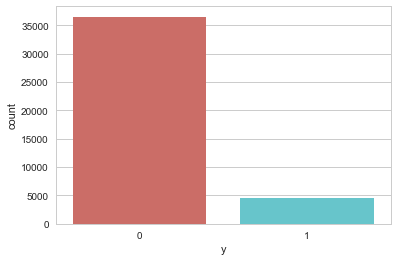

In [25]:
# Graph the outcome
sns.countplot(x = 'y', data = data, palette = 'hls')
plt.show()

One thing that stands out from this bar graph is that it would appear as if our data suffers from a slight "class-imbalance". One of the categories (no to a subscription) is unevenly represented in the sample population. This can lead to difficulty for our algorithm. However, we will keep this in mind but leave it alone for now.

Lets take a look at the distribution of subscribers based on job title:

Text(0,0.5,'Frequency of Subscription')

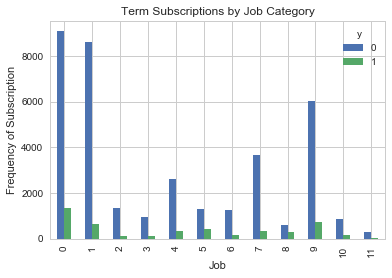

In [24]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Term Subscriptions by Job Category')
plt.xlabel('Job')
plt.ylabel('Frequency of Subscription')

This doesnt really tell us much, because we already encoded our variable into numbers. Even still, we can see that the categories 0 and 1 are more prone to subscribing for the term subscription than others groups. 

In any case, we could continue exploring this data all day long. Indeed, analytics is another important component of data in the business world that revolves around visualizing and story-telling.

Lets get to the fun stuff: building models

### Machine Learning

Machine learning is perhaps the most important component of a data scientist's job. It involves building predictive models to develop insight from data. 

In order to do this, we have to not only build a model, but also train it. Then we can make predictions on a labelled set of observations in order to judge our models performance. So we will have to split the data into different sets for these purposes. I have developed my own custom module for this purpose, which we imported and the beginning of our script. This is the `ml` package. For further reference on how to use this library, please refer to this [article](https://github.com/zxs107020/Projects/blob/master/ml_package/ml_package_explanation.ipynb) that I have written as explanation.

In [26]:
# Split the data into training, validation, and testing sets using `ml`
x_train, x_val, x_test, y_train, y_val, y_test = ml.separate(data, 'y', .3)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


For today's workshop we are going to use a logistic regression. Using our `ml` package, we can either define the model separately or input is as a string directly into our function. 

Today, I am going to define this information in advance.

In [27]:
# Define the library and function
lib = 'from sklearn.linear_model import LogisticRegression'
func = 'LogisticRegression()'

Now we can call the function:

In [28]:
# Perform the logistic regression using `ml`
preds, conf_mat, class_rep, acc = ml.machine_learning(lib, x_train, y_train, x_val, y_val, func)

And thats all she wrote, as the saying goes. Our model has been built and deployed to make predictions on our validation set. The validation results are the ones that we would use in the event that we were using multiple models and needed to compare their performance. Then we would select one and make a final set of predictions on the test set.

### Results

There are many different ways to judge a models performance. Perhaps the simplest of these is accuracy, which needs no explanation. Then there are more complicated measures such as "f1" which is the harmonic mean of the recall and precision. We will not bother ourselves with these definitions for now, but lets go ahead and take a look at the results of our model.

In [29]:
print('Confusion Matrix for the Logistic Regression Model', '\n', conf_mat, '\n')

Confusion Matrix for the Logistic Regression Model 
 [[5378  143]
 [ 400  257]] 



This is basically a table of the predictions of our model vs. the actual labels. The diagonals represent correct classifications, so from this we can see that 543 examples were misclassified in total. Not bad.

In [30]:
print('Accuracy for the Logistic Regression Model', acc, '\n')

Accuracy for the Logistic Regression Model 0.9121074781482681 



91% accuracy is pretty good, especially considering the fact that we were worried about our model performance suffering from the class imbalance issue. 

Finally, we can also take a look at the complicated measures for the sake of being comprehensive.

In [31]:
print('Summary statistics for Logistic Regression Model', '\n', class_rep, '\n')

Summary statistics for Logistic Regression Model 
              precision    recall  f1-score   support

          0       0.93      0.97      0.95      5521
          1       0.64      0.39      0.49       657

avg / total       0.90      0.91      0.90      6178
 



Lastly, we can also visualize these results using an ROC curve. This is a graph depicting the false positive rate against the true positive rate, in terms of classification. The main point of this graph is that the amount of area underneath the curve is representative of our model fit. The higher the AUC, the better the model.

To generate our ROC curve, we will again use the `ml` package.

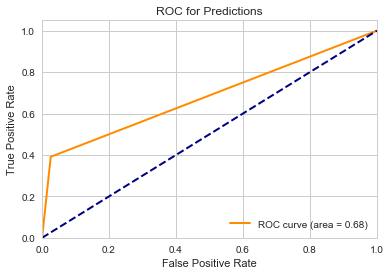

In [32]:
# Visualize the results with an ROC curve
ml.visualize(y_val, preds)

## Conclusion

Data Science is as easy as that. Now of course, in the real world- there are many other considerations that we have to factor in before building a model. These include concepts such as feature engineering and others to develop better insights before feeding the data into a machine learning algorithm. Still, the overall procedure is relatively similar.

In the future, we can try and build on the model that we have created today by using some of these techniques. In addition to feature engineering, we could also try some dimensionality reduction techniques such as PCA- among others. 

Meanwhile, feel free to try and improve on this model on your own to see if you cant increase the accuracy or AUC value of the ROC. 

Good luck!